In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import mpl_toolkits

In [2]:
!pip install basemap
!pip install folium

In [3]:
import mpl_toolkits

In [4]:
from mpl_toolkits.basemap import Basemap

import folium


In [5]:
filename = 'datasets/our_dataframe.csv'

df = pd.read_csv(filename)

df

,Unnamed: 0,Incident ID,Incident Date,State,City Or County,Address,Business/Location Name,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,lat,lon
0,0,2713018,2023-09-22,North Carolina,Rocky Mount,991 S Winstead Ave,Winstead Avenue Elementary,0,0,0,0,0,NaN,35.942383,-77.795695
1,1,2712953,2023-09-22,Tennessee,Nashville,3150 McGavock Pike,McGavock High School,0,0,0,0,1,NaN,36.162277,-86.774298
2,2,2712398,2023-09-21,Alabama,Anniston,4401 Saks Rd,Saks High School,0,0,0,0,1,NaN,33.662482,-85.828322
3,3,2712502,2023-09-21,Florida,Milton,5445 King Arthurs Way,Avalon Middle School,0,0,0,0,2,NaN,30.632415,-87.039688
4,4,2711513,2023-09-20,Maryland,Hyattsville (Landover),6501 Columbia Park Rd,Fairmont Heights High School,0,0,0,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,2180889,2021-12-02,Wisconsin,Madison,702 Pflaum Rd,La Follette High School,0,0,0,0,1,NaN,43.074761,-89.383761
1996,1996,2180722,2021-12-02,Texas,Katy,23440 Cinco Ranch Blvd,Cinco Ranch HS,0,0,0,0,0,NaN,29.785785,-95.824396
1997,1997,2182816,2021-12-02,North Carolina,Charlotte,1100 Eastway Dr,Garinger High School,0,0,0,0,0,NaN,35.227209,-80.843083
1998,1998,2182146,2021-12-02,Texas,Houston,4400 Aldine Mail Rte Rd,MacArthur Senior High School,0,0,0,0,1,NaN,29.758938,-95.367697


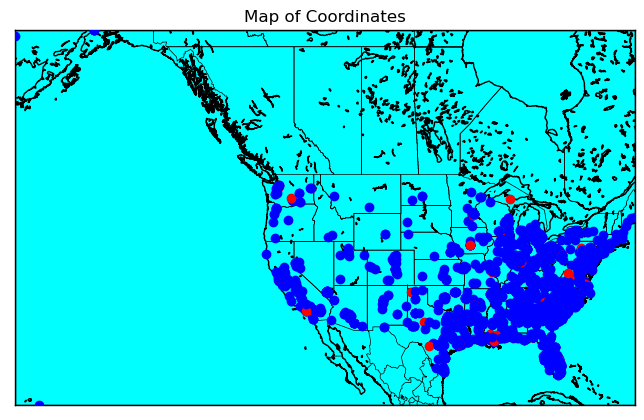

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Create a Basemap instance
mask = df['lon']>-360

m = Basemap(
    projection='merc',
    llcrnrlat=df[mask]['lat'].min(),
    urcrnrlat=df[mask]['lat'].max(),
    llcrnrlon=df[mask]['lon'].min(),
    urcrnrlon=df[mask]['lon'].max(),
    resolution='i'
)

# Create a figure
plt.figure(figsize=(8, 6))


'''
# Convert coordinates to map projection
x, y = m(df[mask]['lon'].values, df[mask]['lat'].values)
# Plot the data points on the map
m.scatter(x, y, marker='o', color='blue', zorder=5)
'''

# Do in a loop
dftmp = df[mask]
for i in range(len(dftmp)):
  # Convert coordinates to map projection
  x, y = m(dftmp.iloc[i]['lon'], dftmp.iloc[i]['lat'])
  #print(x,y)
  # Plot the data points on the map
  vkilled = float(dftmp.iloc[i]['Victims Killed'])
  #print(vkilled)

  color = 'blue'
  if vkilled>0.0:
    color='red'

  m.scatter(x, y, marker='o', color=color, zorder=5)


# Draw coastlines, borders, etc. (customize as needed)
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.drawstates()

# Show the map
plt.title("Map of Coordinates")
plt.show()

In [7]:
import folium

m = folium.Map(location=(45.5236, -122.6750))

m

In [8]:
m = folium.Map(location=(35.1, -95.7), zoom_start=5)


mask = df['lon']>-360


# Do in a loop
dftmp = df[mask]
for i in range(len(dftmp)):
  # Convert coordinates to map projection
  x, y = dftmp.iloc[i]['lat'], dftmp.iloc[i]['lon']
  #print(x,y)
  # Plot the data points on the map
  vkilled = float(dftmp.iloc[i]['Victims Killed'])
  color = 'blue'
  if vkilled>0:
    color='red'
  #print(vkilled)
  print(x,y,vkilled)
  folium.Marker(
      location=[x,y],
      tooltip="Click me!",
      popup=f"# of victims = {vkilled}",
      icon=folium.Icon(icon="cloud", color=color),
  ).add_to(m)


m


35.9423833 -77.7956949 0.0
36.1622767 -86.7742984 0.0
33.6624824 -85.8283224 0.0
30.6324149 -87.0396881 0.0
33.2095614 -87.5675258 0.0
41.1153371 -78.7746056 0.0
32.2998686 -90.1830408 0.0
38.5135805 -89.9841627 0.0
39.2156213 -76.8582049 0.0
29.4246002 -98.4951405 0.0
34.1112226 -82.8670839 0.0
42.2625621 -71.8018877 0.0
38.2009055 -84.8732836 0.0
40.1936892 -85.3865271 0.0
36.2648185 -80.84776715501519 0.0
33.9255685 -116.875289 0.0
41.5680898 -87.7203257 1.0
39.1134562 -94.626497 0.0
36.8524545 -121.4016021 0.0
39.7589478 -84.1916069 0.0
44.88300545 -93.32131503185956 0.0
34.7494749 -77.4208221 0.0
34.1142554 -85.6004514 0.0
43.6763036 -70.3663874 0.0
42.702266 -114.286704 0.0
38.2542376 -85.759407 0.0
30.3674198 -89.0928155 0.0
32.4640245 -86.4596966 0.0
42.6414437 -71.3085329 0.0
40.08067 -76.2411283 0.0
35.9131542 -79.05578 0.0
39.6828358 -75.7515682 0.0
29.0283213 -81.3031098 0.0
27.4989278 -82.5748194 0.0
30.829635 -90.6677355 1.0
35.7803977 -78.6390989 0.0
34.769536 -92.267094

In [9]:
incidents_by_state = df.groupby('State')['Incident ID'].count()
injuries_by_state = df.groupby('State')['Victims Injured'].sum()
fatalities_by_state = df.groupby('State')['Victims Killed'].sum()
print("Number of incidents in each state:")
print(incidents_by_state)

print("Number of injuries in each state:")
print(injuries_by_state)

print("Number of fatalities in each state:")
print(fatalities_by_state)

Number of incidents in each state:
State
Alabama                  58
Alaska                    5
Arizona                  39
Arkansas                 28
California               94
Colorado                 28
Connecticut               9
Delaware                  9
District of Columbia      9
Florida                 154
Georgia                 102
Hawaii                    1
Idaho                     2
Illinois                 58
Indiana                  66
Iowa                     13
Kansas                   17
Kentucky                 57
Louisiana                41
Maine                     4
Maryland                 65
Massachusetts            18
Michigan                 49
Minnesota                33
Mississippi              26
Missouri                 32
Montana                   2
Nebraska                 13
Nevada                   33
New Hampshire             2
New Jersey               10
New Mexico               23
New York                 43
North Carolina          132
North D